# Upper Confidence Bound (UCB)

## Importing the libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [33]:
ad_opts = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [34]:
ad_opts

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [5]:
import math

In [80]:
N=1000
d=10
ads_selected =[]
numbers_of_selection= [0] *d
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0,N):
  ad =0
  max_upper_bound =0
  for i in range(0,d):
    if numbers_of_selection[i] > 0:
      avg_reward = sums_of_rewards[i]/numbers_of_selection[i]
      delta_i = math.sqrt(3/2* math.log(n+1)/numbers_of_selection[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] = numbers_of_selection[ad] + 1
    rewards = ad_opts.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad]+rewards
    total_rewards = total_rewards + rewards


 

## Visualising the results

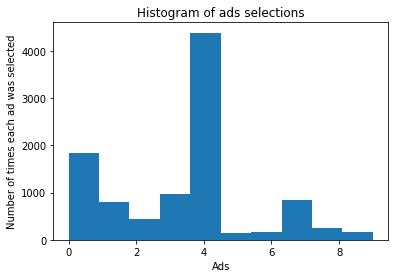

In [81]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Simulating the results for 5000,1000,500 customers

In [85]:
# Creating UCB Function
def upper_confidence_bound(N,d):
  '''
  N is number of cutomers
  d is number of ads,to compare
  '''
  ads_selected_global =[]
  total_number_records = N
  ads_to_compare = d
  ads_selected =[]
  numbers_of_selection=[0] * ads_to_compare
  sum_of_rewards = [0] * ads_to_compare
  total_rewards = 0
  for n in range (0,total_number_records):
    ad=0
    max_upper_bound=0
    for i in range(0,ads_to_compare):
      if numbers_of_selection[i] > 0:
        avg_reward = sum_of_rewards[i]/numbers_of_selection[i]
        delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selection[i])
        upper_bound= avg_reward + delta_i
      else:
        upper_bound=1e400
      if max_upper_bound < upper_bound:
        upper_bound=max_upper_bound
        ad=i
      ads_selected.append(ad)
      numbers_of_selection[ad]=numbers_of_selection[ad]+1
      rewards = ad_opts.values[n,ad]
      sums_of_rewards[ad] = sums_of_rewards[ad]+rewards
      total_rewards = total_rewards + rewards
  return ads_selected,sum_of_rewards
  


In [86]:
ads_selected,sum_of_rewards = upper_confidence_bound(10000,10)

In [87]:
sum_of_rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

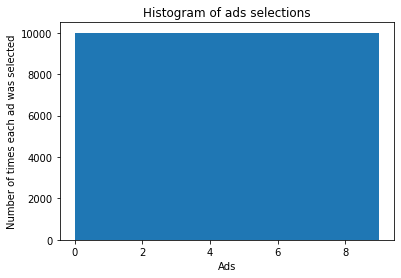

In [84]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()